In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

sys.path.append(os.path.join(os.getcwd()[:os.getcwd().find('notebooks')]))

In [2]:
base_path = os.path.join(os.getcwd()[:os.getcwd().find('notebooks')])

In [11]:
import string
import numpy as np
import pandas as pd
from collections import defaultdict

In [4]:
colors = ["red", "blue", "white", "green", "yellow", "orange"]
color_encoder = {i: k for i, k in enumerate(colors)}

bld_cfg_edges = {
    "start": {
        "U": "red",
        "L": "blue",
        "F": "white",
        "R": "green",
        "B": "yellow",
        "D": "orange"
    },
    "memo_schema": [
        "UB", "UR", "UF", "UL", 
        "LU", "LF", "LD", "LB",
        "FU", "FR", "FD", "FL",
        "RU", "RB", "RD", "RF",
        "BU", "BL", "BD", "BR",
        "DF", "DR", "DB", "DL"
    ]
}

_pos_to_memo = dict(zip(bld_cfg_edges["memo_schema"], string.ascii_uppercase))
_pair_to_memo = {(bld_cfg_edges["start"][k[0]], bld_cfg_edges["start"][k[1]]): v for k, v in _pos_to_memo.items()}
_idx_to_pair = dict(zip(range(0, 24), _pair_to_memo.keys()))

bld_edges_encoder = dict(
    pos_to_memo=_pos_to_memo, 
    pair_to_memo=_pair_to_memo,
    idx_to_pair=_idx_to_pair,
)

In [12]:
def get_random_edge():
    pick = int(np.random.rand() * 24)
    return bld_edges_encoder["idx_to_pair"][pick]

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.figure import Figure
from typing import Tuple

def draw_edge(edge: Tuple):

    print(bld_edges_encoder["pair_to_memo"][edge])

    fig = Figure(figsize=(2, 2))
    ax = fig.add_subplot(111)

    square_d = patches.Rectangle((0, -1), 1, 1, edgecolor='black', facecolor=edge[0])
    square_f = patches.Rectangle((0, 0), 1, 1, edgecolor='black', facecolor=edge[1])

    ax.add_patch(square_f)
    ax.add_patch(square_d)

    ax.set_axis_off()

    ax.set_xlim(-0, 1)
    ax.set_ylim(-1, 1)

    ax.set_aspect('equal', adjustable='box')  # Ensures equal aspect ratio

    return fig

<AxesSubplot:>

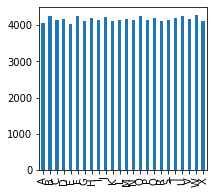

In [13]:
counts = defaultdict(int)

for i in range(100000):
    edge = bld_edges_encoder["pair_to_memo"][get_random_edge()]
    counts[edge] += 1


pd.Series(counts).sort_index().plot.bar(figsize=(3,3))

C


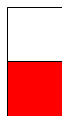

In [14]:
draw_edge(get_random_edge())

### Class

In [22]:
from sctools.bld import Trainer

trainer = Trainer()

X


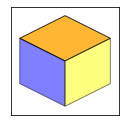

In [48]:
corner = trainer.get_random_piece(ptype="corner")

trainer.draw_corner(corner, print_correct=True)

In [16]:
edge = trainer.get_random_edge()

trainer.draw_edge(edge)

NameError: name 'trainer' is not defined

### Script

In [12]:
files = os.listdir(os.path.join(base_path, "logs"))

all_files = []
for file in files:
    all_files.append(pd.read_csv(os.path.join(base_path, "logs", file)))

logs = pd.concat(all_files)

In [13]:
logs

,Timestamp,Edge,Reference,User Input,Response Time (s)
0,2024-07-05 20:43:10,"('red', 'yellow')",A,a,3.611
1,2024-07-05 20:43:16,"('blue', 'yellow')",H,h,5.491
2,2024-07-05 20:43:21,"('blue', 'red')",E,e,5.310
3,2024-07-05 20:43:30,"('green', 'orange')",O,o,8.836
4,2024-07-05 20:43:35,"('red', 'blue')",D,d,4.194
5,2024-07-05 20:43:43,"('yellow', 'green')",T,t,8.488
6,2024-07-05 20:43:45,"('red', 'yellow')",A,a,1.813
7,2024-07-05 20:43:50,"('white', 'blue')",L,l,4.759
8,2024-07-05 20:43:55,"('orange', 'green')",V,v,4.420
9,2024-07-05 20:44:03,"('blue', 'orange')",G,x,7.657


### Corners

In [17]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.patches import Polygon

def draw_isometric_cube():
    fig = Figure(figsize=(2, 2))
    ax = fig.add_subplot(111)

    # Define the vertices of the cube faces
    top_face = [(0.5, 1), (1, 0.75), (0.5, 0.5), (0, 0.75)]
    left_face = [(0, 0.75), (0.5, 0.5), (0.5, 0), (0, 0.25)]
    right_face = [(1, 0.75), (1, 0.25), (0.5, 0), (0.5, 0.5)]

    # Draw each face
    ax.add_patch(Polygon(top_face, closed=True, edgecolor='black', facecolor='lightblue', alpha=0.8))
    ax.add_patch(Polygon(left_face, closed=True, edgecolor='black', facecolor='lightgray', alpha=0.5))
    ax.add_patch(Polygon(right_face, closed=True, edgecolor='black', facecolor='darkgray', alpha=0.5))

    # Remove axis ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Set axis limits
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)

    # Ensure equal aspect ratio
    ax.set_aspect('equal', adjustable='box')

    return fig

# Example usage:
# fig = draw_isometric_cube()
# plt.show()

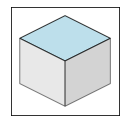

In [18]:
fig = draw_isometric_cube()

fig

In [20]:
from sctools.bld import BLD_CORNERS_ENCODER

In [21]:
BLD_CORNERS_ENCODER

{'pos_to_memo': {'ULB': 'A',
  'UBR': 'B',
  'URF': 'C',
  'UFL': 'D',
  'LBU': 'E',
  'LUF': 'F',
  'LFD': 'G',
  'LDB': 'H',
  'FLU': 'I',
  'FUR': 'J',
  'FRD': 'K',
  'FDL': 'L',
  'RFU': 'M',
  'RUB': 'N',
  'RDF': 'O',
  'RBD': 'P',
  'BRU': 'Q',
  'BUL': 'R',
  'BLD': 'S',
  'BDR': 'T',
  'DLF': 'U',
  'DFR': 'V',
  'DRB': 'W',
  'DBL': 'X'},
 'pair_to_memo': {('red', 'blue'): 'A',
  ('red', 'yellow'): 'B',
  ('red', 'green'): 'C',
  ('red', 'white'): 'D',
  ('blue', 'yellow'): 'E',
  ('blue', 'red'): 'F',
  ('blue', 'white'): 'G',
  ('blue', 'orange'): 'H',
  ('white', 'blue'): 'I',
  ('white', 'red'): 'J',
  ('white', 'green'): 'K',
  ('white', 'orange'): 'L',
  ('green', 'white'): 'M',
  ('green', 'red'): 'N',
  ('green', 'orange'): 'O',
  ('green', 'yellow'): 'P',
  ('yellow', 'green'): 'Q',
  ('yellow', 'red'): 'R',
  ('yellow', 'blue'): 'S',
  ('yellow', 'orange'): 'T',
  ('orange', 'blue'): 'U',
  ('orange', 'white'): 'V',
  ('orange', 'green'): 'W',
  ('orange', 'yellow'

In [19]:
corners_memo_schema = [
    "URF", "RFU", "FUR",
    "UBR", "BRU", "RUB",
    "UFL", "FLU", "LUF",
    "ULB", "LBU", "BUL",
    "DFR", "FRD", "RDF",
    "DRB", "RBD", "BDR",
    "DLF", "LFD", "FDL",
    "DBL", "BLD", "LDB"
]

### Analysis

In [9]:
import os
import pandas as pd

In [10]:
from config import cfg

In [13]:
logs = []
for file in os.listdir(cfg["logs_path"]):
    if 'edges_rec' in file and 'csv' in file:
        logs.append(pd.read_csv(os.path.join(cfg["logs_path"], file)))

logs_df = pd.concat(logs)

In [53]:
logs_df[-100:].groupby("Reference")["Response Time (s)"].mean().sort_values(ascending=False)

Reference
L    5.018000
S    4.093500
T    4.056800
F    3.727000
E    3.548000
H    3.541889
R    3.503250
J    3.178600
N    2.911500
G    2.671333
X    2.665000
W    2.573400
B    2.274800
O    2.271500
Q    2.221333
P    2.157333
K    2.142500
I    1.983667
U    1.862333
D    1.728000
M    1.564000
V    1.513167
C    1.418750
A    1.355250
Name: Response Time (s), dtype: float64

In [37]:
# logs_df.set_index("Timestamp")["Response Time (s)"].rolling(5).mean().plot()